# Assignment 2a Due 9/8

In this assigment you will explore and become familiar with writing and using algorithms to numerically approxomate definite integrals.

Assignment Overview:
* Impliment your own midpoint, trapazoid, and Simpson's rule integration algorithms
* Use those to solve a definite integral
* Compare your algorithms to those from scipy
* Compare all approximate solutions to the exact solutions


You can import only the following packages: numpy, math, scipy, matplotlib.pyplot

In [172]:
#your import cell
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import trapz, simps, quad
%matplotlib notebook

Now we can define our integration algorithms

In [105]:
#define midpoint rule
def integrate_midpoint(f, x0, xn, n):
    """Approximates integral using Riemann sum of the midpoint.
       Takes the function f(x), bounds a and b, and number of partitions, n as arguments."""
    dx = (xn - x0) / n
    return sum([dx * f(x0 + i*dx + dx/2) for i in range(0,n)])

In [106]:
#define trapazoidal rule
def integrate_trapezoid(f, x0, xn, n):
    """Approximates integral using trapezoidal Riemann sum method
       Takes the function f(x), bounds a and b, and number of partitions, n as arguments."""
    dx = (xn - x0) / n
    return (dx/2) * (2 * sum([f(x0 + i*dx) for i in range(1,n)]) + f(x0) + f(xn))

In [107]:
#define simpson's rule
def integrate_simpsons(f, x0, xn, n):
    """Approximates the integral of f from x0 to xn using Simpson's method"""
    return ((xn - x0) / 6) * (f(x0) + 4*f((x0 + xn) / 2) + f(xn))

# Question 
Sanity checking your code is very important. How can you check that your functions are working properly?

For this notebook assigment we would like to solve the integral\
$\int_{a}^{b} \frac{2}{(2^2 + x^2)^{3/2}}dx$

$\begin{align*}
\int_a^b \frac{2}{(2^2 + x^2)^{3/2}} \;dx &= \int_a^b \frac{2}{\left(\sqrt{2^2 + x^2}\right)^3} \;dx
\end{align*}$

$x = 2 \tan{\theta}$

$\begin{align*}
\int_a^b \frac{2}{(2^2 + x^2)^{3/2}} \;dx &= 2 \cdot \int_a^b \frac{1}{\left(2^2 + x^2\right)^{3/2}} \;dx \\
&= 2 \cdot \int_a^b \frac{1}{\left(2^2 \cdot \left(1 + \frac{x^2}{2^2}\right)\right)^{3/2}} \;dx \\
&= 2 \cdot \int_a^b \frac{1}{\left(4 + x^2\right)^{3/2}} \;dx
\end{align*}$

$x = 2 \tan{\theta} \implies \theta = \arctan{\left(\frac{x}{2}\right)}$

$dx = 2 \sec^2{\theta} \;d\theta$

$\begin{align*}
\int_a^b \frac{2}{(2^2 + x^2)^{3/2}} \;dx &= 2 \cdot \int_{\arctan{\left(a/2\right)}}^{\arctan{\left(b/2\right)}} \frac{2 \sec^2{\theta}}{\left(4 + (2 \tan{\theta})^2\right)^{3/2}} \;d\theta \\
&= 2 \cdot \int_{\arctan{\left(a/2\right)}}^{\arctan{\left(b/2\right)}} \frac{2 \sec^2{\theta}}{\left(4 + 4 \tan^2{\theta}\right)^{3/2}} \;d\theta \\ 
&= 2 \cdot \int_{\arctan{\left(a/2\right)}}^{\arctan{\left(b/2\right)}} \frac{2 \sec^2{\theta}}{(4 \sec^2{\theta})^{3/2}} \;d\theta \\
&= 2 \cdot \int_{\arctan{\left(a/2\right)}}^{\arctan{\left(b/2\right)}} \frac{2 \sec^2{\theta}}{8 \sec^3{\theta})} \;d\theta \\
&= \frac{1}{2} \cdot \int_{\arctan{\left(a/2\right)}}^{\arctan{\left(b/2\right)}} \cos{\theta} \;d\theta \\
&= \frac{1}{2} \Big[\sin{\theta}\Big]_{\arctan{\left(a/2\right)}}^{\arctan{\left(b/2\right)}}
\end{align*}$

# Question
Have you seen an integral like this before in physics? From where?

I haven't seen this integral in physics before.
I am not a physics major and have only taken the introductory classes.

Solve the above integral using the numerical integrations that you wrote. When defining the function we will integrate over do so using python's **lambda** function.

For the integration take $a = 0,\; b = 2,\;$ and we will split it up into 6 partitions.

In [86]:
f = lambda x: 2 / ((2 ** 2 + x ** 2) ** (3/2))
x0 = 0
xn = 2
n = 6
dx = float((xn - x0) / n)

# Question
What is the exact solution?

$\frac{1}{2} \left[\sin{(\arctan{1})} - \sin{(\arctan{0})}\right] = \frac{1}{2} \left[\sin{\left(\frac{\pi}{4}\right)} - \sin{(0)}\right] = \frac{1}{2} \cdot \frac{\sqrt{2}}{2} = \frac{\sqrt{2}}{4}$

In [79]:
#exact solution to the integral
exact_solution = np.sqrt(2) / 4
exact_solution

0.3535533905932738

In [117]:
#solve the integral using your integration functions
result_midpoint = integrate_midpoint(f, x0, xn, n)
result_trapezoid = integrate_trapezoid(f, x0, xn, n)
result_simpson = integrate_simpsons(f, x0, xn, n)

Use the trapz and simps methods from scipy's integration library to solve the integral.

Note: Shit+tab at the end of a function in jupyter notebook reveals lots of information about the function.

In [116]:
#scipy integration
xs = np.linspace(x0, xn, n+1)
ys = f(xs)
sci_trap = trapz(ys,xs,dx)
sci_simps = simps(ys,xs,dx)

# Question
How do scipy integrals compare to yours? Support your answer. 

The `scipy.integrate.trapz` function gives precisely the same numeric output as my trapezoid integral.
However, my Simpson's integral output differed slightly than the `scipy.integrate.simps` function's output, however both are still accurate to the exact solution.

In [127]:
#print the numerical values
print('Exact solution:')
print(exact_solution)

print('\nMidpoint:')
print(result_midpoint)

print('\nTrapezoid:')
print(result_trapezoid)

print('\nSimpson\'s rule:')
print(result_simpson)

print('\nscipy.integrate.trapz:')
print(sci_trap)

print('\nscipy.integrate.simps:')
print(sci_simps)

Exact solution:
0.3535533905932738

Midpoint:
0.3538599754585315

Trapezoid:
0.35293994641413146

Simpson's rule:
0.35131003348275036

scipy.integrate.trapz:
0.35293994641413146

scipy.integrate.simps:
0.35355179062444925


Numerically compare your midpoint, trapazoid, and Simpson method results to the exact value by calculating the quantity (approx - exact) / exact for each method. 

In [128]:
#numerical comparisons
error_midpoint = (result_midpoint - exact_solution) / exact_solution
error_trapezoid = (result_trapezoid - exact_solution) / exact_solution
error_simpson = (result_simpson - exact_solution) / exact_solution

print('Midpoint error:')
print(np.abs(error_midpoint))

print('\nTrapezoid error:')
print(np.abs(error_trapezoid))

print('\nSimpson\'s rule error:')
print(np.abs(error_simpson))

Midpoint error:
0.0008671529489315273

Trapezoid error:
0.0017350821558038288

Simpson's rule error:
0.006345172101896692


# Question
Which method provides the best approximation to the exact solution?

Surprisingly, my midpoint integral had the best approximation with the least amount of error from the exact solution.

It is often useful to represent the data graphically. Make a scatter plot showing the percent difference $100 \times \frac{approx. - exact}{exact}$ vs. integration method. Integration method on your x-axis should be strings such as *midpoint, trapazoid, and Simpson*. You should also draw on your plot a line at *y = 0*, which will help guide the eye where the perfect approximation (the exact solution) would sit. 

<IPython.core.display.Javascript object>


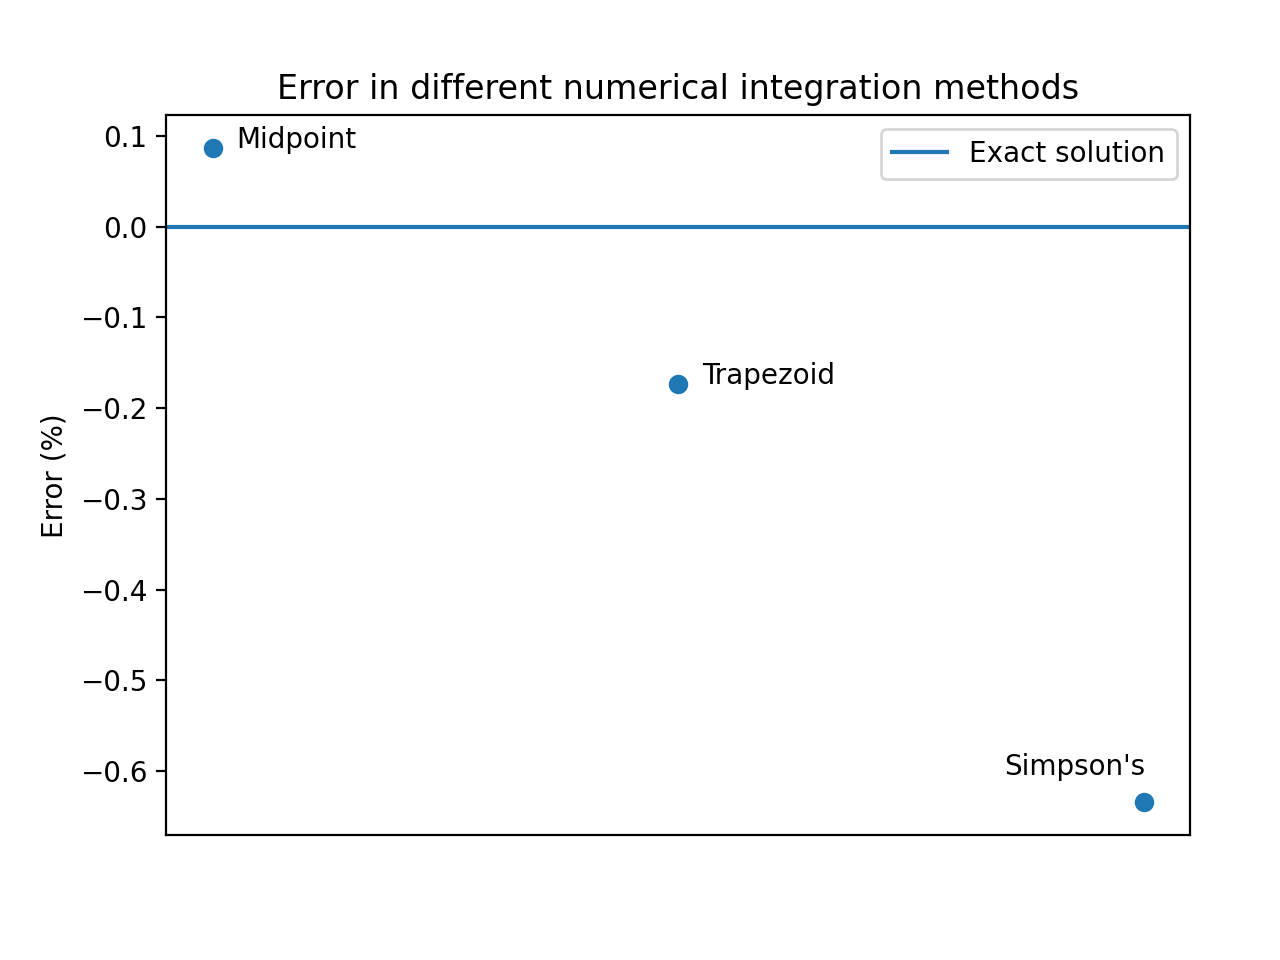

In [171]:
#plot
fig = plt.figure()
ax = fig.add_axes([0.13,0.13,0.8,0.75])
ax.scatter([1,2,3], [error_midpoint * 100, error_trapezoid * 100, error_simpson * 100])
ax.annotate("Midpoint", (1 + .05, error_midpoint * 100))
ax.annotate("Trapezoid", (2 + .05, error_trapezoid * 100))
ax.annotate("Simpson's", (3 - .3, (error_simpson + .0003) * 100))
ax.axhline(y=0, label="Exact solution")
ax.set_title("Error in different numerical integration methods")
ax.set_ylabel("Error (%)")
ax.set_xticks([])
ax.legend();

Using the scipy *quad* integration method, approximate the following integral

$$\int_{-\infty}^{\infty} e^{-x^{2}} dx$$

Hint: Reference <a href="https://numpy.org/">numpy</a> and see what it has to offer in terms of functions and *special* values

In [177]:
#solve integral above
f = lambda x: np.exp(-(x ** 2))

solution, error = quad(f, -np.Infinity, np.Infinity)

print(solution)

1.7724538509055159


# Question
If you square your solution, does the resulting number have any special meaning?

In [176]:
solution ** 2

3.1415926535897927

Yes, the resulting number after I square my solution is $\pi$.